# **Racing Data Analysis Project**

Our primary goal is to analyze and determine which cars dominate on specific tracks and identify the most versatile vehicles.

For 50 laps we will got that assess system:

1. 1st place: 10 points + 3 bonuses = 13 points
2. 2nd place: 9 points + 2 bonuses = 11 points
3. 3rd place: 8 points + 1 bonus = 9 points
4. 4th place: 7 points
5. 5th place: 6 points
6. 6th place: 5 points
7. 7th place: 4 points
8. 8th place: 3 points
9. 9th place: 2 points
10. 10th place: 1 point

**Race Length Accounting**

Determine the base length of the race (eg 50 laps).<br>
If the race is longer, for example 64 laps, the points are multiplied by a factor (64/50).<br>
If the race is shorter, for example 42 laps, the points are multiplied by a factor (42/50).<br>
So, if a win is worth 13 points in a 50-lap race, in a 64-lap race it will be worth 13 * (64/50) = 16.64 points.

## **1. Load Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load Data**

In [3]:
df = pd.read_parquet(".\\cleaned_data\\race_data.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7319 entries, 0 to 7318
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Season                7319 non-null   int64          
 1   Meeting               7319 non-null   object         
 2   Event name            7319 non-null   object         
 3   Pos                   7319 non-null   int64          
 4   Car #                 7319 non-null   int64          
 5   Class                 7319 non-null   category       
 6   Special Class         7319 non-null   bool           
 7   Drivers               7319 non-null   object         
 8   Team                  7319 non-null   object         
 9   Car                   7319 non-null   object         
 10  Best lap set          7319 non-null   bool           
 11  Time                  7319 non-null   object         
 12  Time timedelta        7319 non-null   timedelta64[ns]
 13  Lap

In [4]:
categories_order = df['Class'].cat.categories

print(categories_order)

Index(['Invitational', 'Am Cup', 'Bronze Cup', 'Pro-Am Cup', 'Silver Cup',
       'Gold Cup', 'Pro Cup'],
      dtype='object')


In [5]:
is_ordered = df['Class'].cat.ordered

print("Is the 'Class' column ordered?" , is_ordered)

Is the 'Class' column ordered? True


In [6]:
df[(df['Season'] == 2021) & (df['Meeting'] == 'Monza') & (df['Pos'] == 1)]['Event name'].value_counts()

Event name
Main Race                     1
Main Race after 1.30 hour     1
Main Race after 2.30 hours    1
Name: count, dtype: int64

In [7]:
df[(df['Season'] == 2021) & (df['Meeting'] == 'Monza') & (df['Event name'] == 'Main Race') & (df['Pos'] == 1)]['Laps'].value_counts()

Laps
79    1
Name: count, dtype: int64

## Best by Points
Add Points column

In [8]:
# Definition of the point system
points_system = {1: 15, 2: 12, 3: 10, 4: 7, 5: 6, 6: 5, 7: 4, 8: 3, 9: 2, 10: 1}

# Function to assign points based on position
def assign_points(pos, laps, base_laps=50):
    base_points = points_system.get(pos, 0)
    lap_factor = laps / base_laps
    return base_points * lap_factor

# Adding a 'Points' column to the DataFrame
df['Points'] = df.apply(lambda row: assign_points(row['Pos'], row['Laps']), axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7319 entries, 0 to 7318
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Season                7319 non-null   int64          
 1   Meeting               7319 non-null   object         
 2   Event name            7319 non-null   object         
 3   Pos                   7319 non-null   int64          
 4   Car #                 7319 non-null   int64          
 5   Class                 7319 non-null   category       
 6   Special Class         7319 non-null   bool           
 7   Drivers               7319 non-null   object         
 8   Team                  7319 non-null   object         
 9   Car                   7319 non-null   object         
 10  Best lap set          7319 non-null   bool           
 11  Time                  7319 non-null   object         
 12  Time timedelta        7319 non-null   timedelta64[ns]
 13  Lap

In [10]:
filtered_data = df[(df['Meeting'] == 'CrowdStrike 24 Hours of Spa') & (df['Season'] == 2023)]
total_points_by_car = filtered_data.groupby('Car')['Points'].sum().sort_values(ascending=False).reset_index()
total_points_by_car

,Car,Points
0,Audi R8 LMS GT3 EVO 2,2582.94
1,BMW M4 GT3,2431.52
2,Porsche 911 GT3 R (992),1580.96
3,Mercedes-AMG GT3,1561.62
4,McLaren 720S GT3 EVO,243.58
5,Ferrari 296 GT3,117.26
6,Lamborghini Huracan GT3 EVO 2,60.42
7,Aston Martin Vantage GT3,0.00
8,Ferrari 488 GT3,0.00
9,Porsche 911 GT3-R (991.II),0.00


In [11]:
df[df['Season'] == 2023]['Meeting'].unique()

array(['Barcelona', 'Brands Hatch', 'Circuit Paul Ricard 1000Km',
       'CrowdStrike 24 Hours of Spa', 'Hockenheim', 'Misano', 'Monza',
       'Nürburgring', 'Valencia', 'Zandvoort'], dtype=object)

In [12]:
# Подготовка датафрейма для хранения общих результатов
total_points_by_car_and_track = pd.DataFrame()

# Получение уникальных трасс и сезонов
unique_tracks = df['Meeting'].unique()
unique_seasons = df['Season'].unique()

# Цикл по всем сезонам и трассам для расчета баллов
for season in unique_seasons:
    for track in unique_tracks:
        # Фильтрация данных для конкретной трассы и сезона
        filtered_data = df[(df['Meeting'] == track) & (df['Season'] == season)]
        
        # Проверка, есть ли данные для данной трассы и сезона
        if not filtered_data.empty:
            # Расчет и суммирование баллов
            points_by_car = filtered_data.groupby('Car')['Points'].sum().sort_values(ascending=False).reset_index()
            
            # Добавление информации о трассе и сезоне
            points_by_car['Track'] = track
            points_by_car['Season'] = season
            
            # Сохранение результатов в общем датафрейме
            total_points_by_car_and_track = pd.concat([total_points_by_car_and_track, points_by_car])

# Сброс индекса в итоговом датафрейме
total_points_by_car_and_track.reset_index(drop=True, inplace=True)

# Отображение итогового датафрейма
total_points_by_car_and_track.head()


,Car,Points,Track,Season
0,Mercedes-AMG GT3,103.90,Barcelona,2021
1,Porsche 911 GT3-R (991.II),65.44,Barcelona,2021
2,Lamborghini Huracan GT3 Evo,49.20,Barcelona,2021
3,Audi R8 LMS GT3,34.96,Barcelona,2021
4,Ferrari 488 GT3,30.04,Barcelona,2021


In [13]:
filtered_data = total_points_by_car_and_track[total_points_by_car_and_track['Season'] == 2023]
best_cars = filtered_data.groupby('Car')['Points'].sum().sort_values(ascending=False).reset_index()
best_cars

,Car,Points
0,Audi R8 LMS GT3 EVO 2,3081.72
1,BMW M4 GT3,2984.22
2,Mercedes-AMG GT3,1925.56
3,Porsche 911 GT3 R (992),1674.94
4,Ferrari 296 GT3,400.46
5,McLaren 720S GT3 EVO,262.60
6,Mercedes-AMG GT3 EVO,244.42
7,Lamborghini Huracan GT3 EVO 2,153.20
8,Aston Martin Vantage GT3,0.00
9,Ferrari 488 GT3,0.00


## Best on Barcelona

In [18]:
filtered_data = total_points_by_car_and_track[(total_points_by_car_and_track['Season'] == 2023) & (total_points_by_car_and_track['Track'] == 'Barcelona')]
best_cars = filtered_data.groupby('Car')['Points'].sum().sort_values(ascending=False).reset_index()
best_cars

,Car,Points
0,Ferrari 296 GT3,65.38
1,Mercedes-AMG GT3 EVO,57.18
2,Porsche 911 GT3 R (992),36.74
3,McLaren 720S GT3 EVO,8.10
4,Audi R8 LMS GT3 EVO 2,4.46
5,BMW M4 GT3,3.64
6,Aston Martin Vantage GT3,0.00
7,Lamborghini Huracan GT3 EVO 2,0.00
8,Mercedes-AMG GT3,0.00


## Best on Spa

In [20]:
filtered_data = total_points_by_car_and_track[(total_points_by_car_and_track['Season'] == 2023) & (total_points_by_car_and_track['Track'] == 'CrowdStrike 24 Hours of Spa')]
best_cars = filtered_data.groupby('Car')['Points'].sum().sort_values(ascending=False).reset_index()
best_cars

,Car,Points
0,Mercedes-AMG GT3,339.86
1,BMW M4 GT3,250.98
2,Audi R8 LMS GT3 EVO 2,184.36
3,Ferrari 296 GT3,129.62
4,Lamborghini Huracan GT3 EVO 2,24.60
5,Aston Martin Vantage GT3,0.00
6,Ferrari 488 GT3,0.00
7,McLaren 720S GT3 EVO,0.00
8,Porsche 911 GT3 R (992),0.00
9,Porsche 911 GT3-R (991.II),0.00


`Make an ANOVA test and pairwise_tukeyhsd for all RaceTracks to know if there is a Outperforming car`

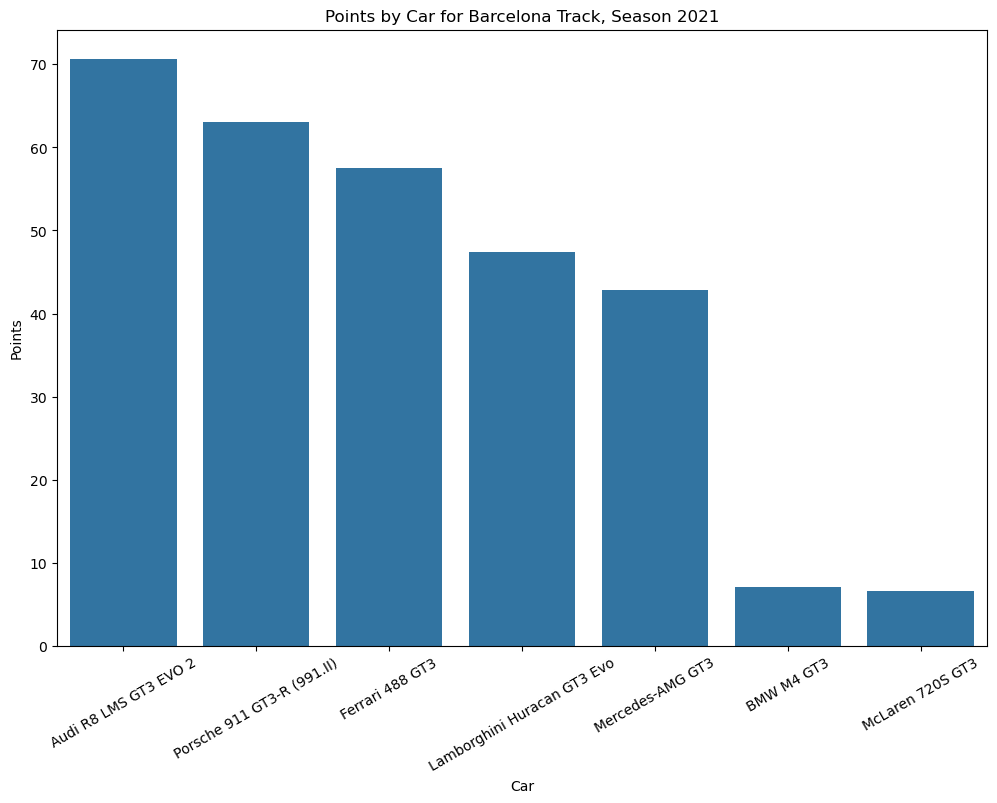

In [15]:
# Фильтрация данных для сезона 2021 и трассы Barcelona
filtered_data = total_points_by_car_and_track[(total_points_by_car_and_track['Season'] == 2022) &
                                             (total_points_by_car_and_track['Track'] == 'Barcelona')]

# Создание barplot
plt.figure(figsize=(12, 8))  # Установка размера фигуры
barplot = sns.barplot(data=filtered_data, x='Car', y='Points')

# Улучшение читабельности: поворот меток на оси X
plt.xticks(rotation=30)

# Добавление названий и меток
plt.title('Points by Car for Barcelona Track, Season 2021')
plt.xlabel('Car')
plt.ylabel('Points')

# Отображение графика
plt.show()